In [110]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [111]:
X, y = mnist["data"], mnist["target"]

In [112]:
#What we dod is the data into a numpy arr

import matplotlib as mpl
import matplotlib.pyplot as plt
X = X.to_numpy()
some_digit = X[0]
print(some_digit)
some_digit_image = some_digit.reshape(28, 28)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

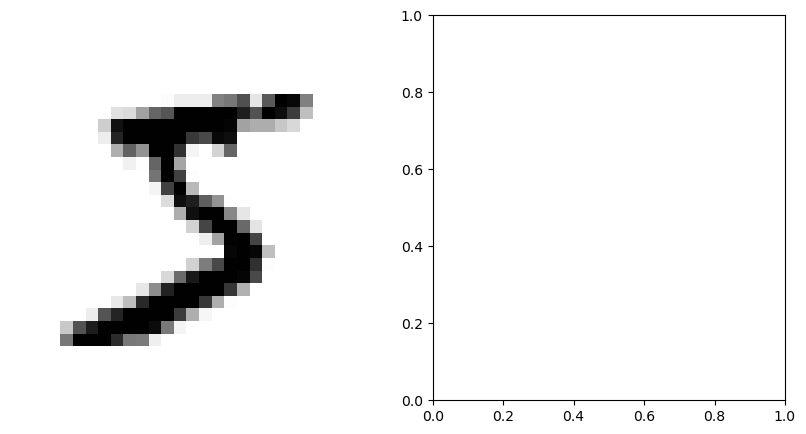

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
axes[0].axis("off")

# Plot the second image

plt.show()

In [106]:
y = y.astype(np.uint8)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


In [76]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [77]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
y_train_5, y_test_5

(0         True
 1        False
 2        False
 3        False
 4        False
          ...  
 59995    False
 59996    False
 59997     True
 59998    False
 59999    False
 Name: class, Length: 60000, dtype: bool,
 60000    False
 60001    False
 60002    False
 60003    False
 60004    False
          ...  
 69995    False
 69996    False
 69997    False
 69998     True
 69999    False
 Name: class, Length: 10000, dtype: bool)

In [78]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [79]:
sgd_clf.predict([some_digit])

array([ True])

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  print(train_index, test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

[19964 19965 19966 ... 59997 59998 59999] [    0     1     2 ... 20331 20342 20359]
0.95035
[    0     1     2 ... 59997 59998 59999] [19964 19965 19966 ... 40088 40125 40127]
0.96035
[    0     1     2 ... 40088 40125 40127] [39988 39989 39990 ... 59997 59998 59999]
0.9604


In [81]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [82]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [83]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [84]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [86]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection, this is the answers to the training set
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [87]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [88]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [89]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [90]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [91]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [92]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [93]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Here we are plotting the precision recall threshold. According to the graph when the threshold increases to 8000 the classifier does not detect it, but when the threshold is at 0 it does

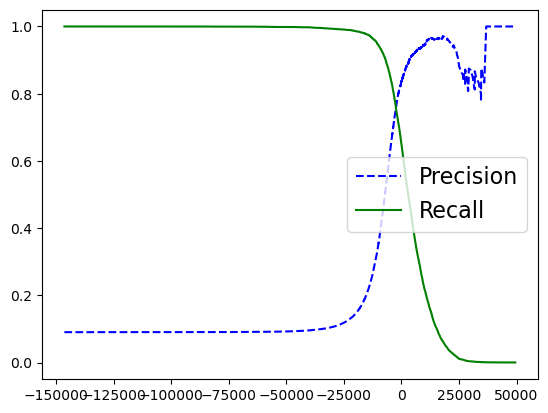

In [94]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(loc="center right", fontsize=16) # Not shown in the book1

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Next we are going to look for the lowest threshold that gives you about 90 percent precision 
We can use the thresholds from our precision recall

In [95]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]  # ~7816
print(threshold_90_precision)
y_train_pred_90 = (y_scores >= threshold_90_precision)

3370.019499144183


In [96]:
precision_score=precision_score(y_train_5, y_train_pred_90)
recall_score=recall_score(y_train_5, y_train_pred_90)
print(f'Precision score: {precision_score} Recall: {recall_score}')


Precision score: 0.9000345901072293 Recall: 0.4799852425751706


In [97]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


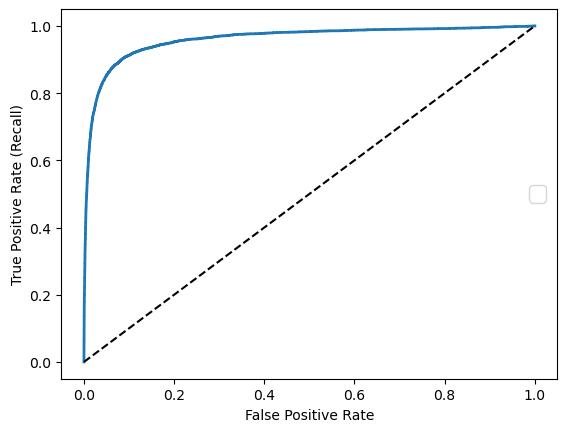

In [98]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
plot_roc_curve(fpr, tpr)
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [100]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

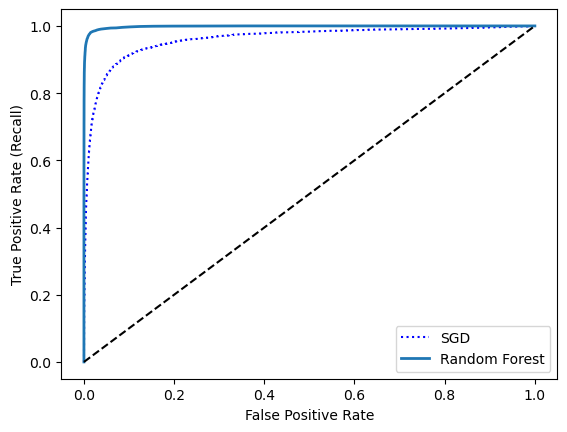

In [101]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)


0.9983296721818179

Now we will train the Multiclass Classifcation
What I know from this is that you can create a system that is either <b>OVA or OVO</b>
Usually in OVO its one versus one so like distinguishing 1s and 2s or distinguishing 0s and 2s
Meaning for the MNIST problem there would be a need to train 45 models

Now for OVA you need to train 10 binary classifiers 0 - 9. Generally for algorithms like SVM since they scale poorly with the training set OvO is preferred 

Now lets run a OVA since scikit learn does it automatically for SGD classifiers


In [103]:
sgd_clf.fit(X_train, y_train)  # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [104]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [105]:
np.argmax(some_digit_scores)

3